In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'color',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=200,
    validation_split=0.2,  # Keep for data split during loading
    subset="training"
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'color',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=200,
    validation_split=0.2,  # Keep for data split during loading
    subset="validation"
)

Found 54305 files belonging to 38 classes.
Using 10861 files for validation.


In [4]:
print(training_set.class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [5]:
print(validation_set.class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

## Model Building

In [7]:
xception_model = tf.keras.models.Sequential()
pretrained_model = keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(128,128,3),
    pooling="avg",
    classes=38,
)

for layer in pretrained_model.layers:
    layer.trainable = False

xception_model.add(pretrained_model)
xception_model.add(tf.keras.layers.Flatten())
xception_model.add(tf.keras.layers.Dense(512, activation="relu"))
xception_model.add(tf.keras.layers.Dense(units=38, activation="softmax"))    

In [8]:
xception_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 38)                19494     
                                                                 
Total params: 21,930,062
Trainable params: 1,068,582
Non-trainable params: 20,861,480
_________________________________________________________________


In [9]:
xception_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
training_history = xception_model.fit(training_set,
                                    validation_data=validation_set,
                                    epochs=10)

Epoch 1/10
1358/1358 [==============================] - 721s 531ms/step - loss: 1.2342 - accuracy: 0.6463 - val_loss: 1.3707 - val_accuracy: 0.6308
Epoch 2/10
1358/1358 [==============================] - 721s 531ms/step - loss: 1.0914 - accuracy: 0.6794 - val_loss: 1.3324 - val_accuracy: 0.6365
Epoch 3/10
1358/1358 [==============================] - 718s 528ms/step - loss: 1.0047 - accuracy: 0.7016 - val_loss: 1.2631 - val_accuracy: 0.6524
Epoch 4/10
1358/1358 [==============================] - 744s 548ms/step - loss: 0.9188 - accuracy: 0.7221 - val_loss: 1.1384 - val_accuracy: 0.6800
Epoch 5/10
1358/1358 [==============================] - 757s 557ms/step - loss: 0.8562 - accuracy: 0.7408 - val_loss: 1.1583 - val_accuracy: 0.6821
Epoch 6/10
1358/1358 [==============================] - 795s 585ms/step - loss: 0.8006 - accuracy: 0.7560 - val_loss: 1.1441 - val_accuracy: 0.6898
Epoch 7/10
1358/1358 [==============================] - 767s 565ms/step - loss: 0.7497 - accuracy: 0.7697 - val_

## Evaluating the Model

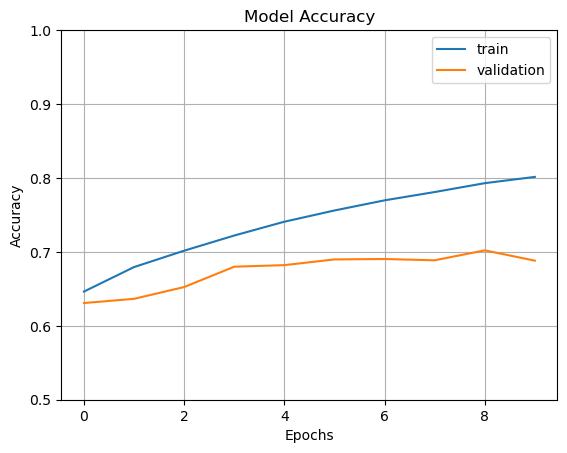

In [12]:
fig1 = plt.gcf()
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.axis(ymin=0.5, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [13]:
train_loss, train_acc = xception_model.evaluate(training_set)
print('Training accuracy:', train_acc)

1358/1358 [==============================] - 621s 457ms/step - loss: 0.6932 - accuracy: 0.7802
Training accuracy: 0.780153751373291


In [14]:
val_loss, val_acc = xception_model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

340/340 [==============================] - 148s 436ms/step - loss: 1.1366 - accuracy: 0.6882
Validation accuracy: 0.6881502866744995


## Saving Model

In [15]:
xception_model.save('trained_xception_model.keras')

In [16]:
training_history.history

{'loss': [1.234190583229065,
  1.0913645029067993,
  1.0046749114990234,
  0.9188178181648254,
  0.8562048673629761,
  0.8005692958831787,
  0.7496660351753235,
  0.707787275314331,
  0.6645786762237549,
  0.631908118724823],
 'accuracy': [0.6463032960891724,
  0.6794493794441223,
  0.7016158699989319,
  0.7221250534057617,
  0.7408157587051392,
  0.756007730960846,
  0.7697265148162842,
  0.7809593677520752,
  0.7929518222808838,
  0.8014225363731384],
 'val_loss': [1.3707082271575928,
  1.3324291706085205,
  1.2630615234375,
  1.1384434700012207,
  1.1582868099212646,
  1.144141435623169,
  1.0893837213516235,
  1.1230326890945435,
  1.079508662223816,
  1.1366257667541504],
 'val_accuracy': [0.630789041519165,
  0.6364975571632385,
  0.6524261236190796,
  0.679955780506134,
  0.6820734739303589,
  0.6898075938224792,
  0.6903600096702576,
  0.6886106133460999,
  0.7020531892776489,
  0.6881502866744995]}

In [17]:
#Recording History in jason
import json
with open("training_hist.json","w")as f:
    json.dump(training_history.history,f)